# Lending Club Case study

#### Below are the steps which we will be following:

1. [Step 1: Data Sourcing](#step1)
1.  [Step 2: Data Cleaning](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
1. [Step 3: Derived Columns](#3)
    - issue_month
    - issue_year
1. [Step 4: Univariate Analysis](#4)
    - issue_month
    - issue_year

<a id="step1"></a>
## Step 1: Data Sourcing
The data provided in this case study is private data. all the data is provided in one file loan.csv

In [230]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [231]:
# Reading the loan.csv file on which analysis needs to be done

df_loan = pd.read_csv("loan.csv",low_memory=False)

df_loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [232]:
# shape of the data
df_loan.shape

(39717, 111)

In [233]:
# information of the data
df_loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

<a id="2"></a>
## Step2-Data Cleaning

In [234]:
#below mentioned columns will be removed as they donot have valid data. 
#Some of these columns are customer behaviour columns for which we will not be having data at the time of loan appliocation hence deleting them.
#this list is prepared based on the manual inspection of the data set.

invalidColumns = ['id','member_id','pymnt_plan','url','desc','title','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med',
'mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m',
'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal',
'bc_open_to_buy','bc_util','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
'mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
'num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']

df_loan_cleaned = df_loan.drop(invalidColumns, axis=1)

In [235]:
# information of cleaned data
df_loan_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   funded_amnt_inv           39717 non-null  float64
 3   term                      39717 non-null  object 
 4   int_rate                  39717 non-null  object 
 5   installment               39717 non-null  float64
 6   grade                     39717 non-null  object 
 7   sub_grade                 39717 non-null  object 
 8   emp_title                 37258 non-null  object 
 9   emp_length                38642 non-null  object 
 10  home_ownership            39717 non-null  object 
 11  annual_inc                39717 non-null  float64
 12  verification_status       39717 non-null  object 
 13  issue_d                   39717 non-null  object 
 14  loan_s

In [236]:
df_loan_cleaned.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [237]:
#Remove row with loan status as current
df_loan_cleaned = df_loan_cleaned[df_loan_cleaned.loan_status != 'Current']


In [238]:
# Calculating the Missing Values % contribution in DF

#df_null = df_loan_cleaned.isna().mean().round(4) * 100
df_null = df_loan_cleaned.isnull().mean().round(4) * 100
df_null.sort_values(ascending=False).head(15)

next_pymnt_d                100.00
mths_since_last_record       92.90
mths_since_last_delinq       64.56
emp_title                     6.19
emp_length                    2.68
pub_rec_bankruptcies          1.81
chargeoff_within_12_mths      0.15
tax_liens                     0.10
loan_status                   0.00
initial_list_status           0.00
dti                           0.00
addr_state                    0.00
zip_code                      0.00
purpose                       0.00
loan_amnt                     0.00
dtype: float64

In [239]:
#checking for duplicates, no duplicate records found
df_loan_cleaned[df_loan_cleaned.duplicated()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,initial_list_status,next_pymnt_d,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens


In [240]:
#removing next_pymnt_d,mths_since_last_record and mths_since_last_delinq as most of the values are null
df_loan_cleaned.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'], axis=1,inplace=True)
df_null = df_loan_cleaned.isnull().mean().round(4) * 100
df_null.sort_values(ascending=False).head(15)

emp_title                   6.19
emp_length                  2.68
pub_rec_bankruptcies        1.81
chargeoff_within_12_mths    0.15
tax_liens                   0.10
issue_d                     0.00
initial_list_status         0.00
dti                         0.00
addr_state                  0.00
zip_code                    0.00
purpose                     0.00
loan_status                 0.00
loan_amnt                   0.00
verification_status         0.00
funded_amnt                 0.00
dtype: float64

In [241]:
#imputing null values as "not Available" for emp_title feature as this is categorical
df_loan_cleaned["emp_title"].fillna("Not Available", inplace = True)
df_loan_cleaned[df_loan_cleaned.emp_title.isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,issue_d,loan_status,purpose,zip_code,addr_state,dti,initial_list_status,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens


In [242]:
df_null = df_loan_cleaned.isnull().mean().round(4) * 100
df_null.sort_values(ascending=False).head(15)

emp_length                  2.68
pub_rec_bankruptcies        1.81
chargeoff_within_12_mths    0.15
tax_liens                   0.10
verification_status         0.00
initial_list_status         0.00
dti                         0.00
addr_state                  0.00
zip_code                    0.00
purpose                     0.00
loan_status                 0.00
issue_d                     0.00
loan_amnt                   0.00
funded_amnt                 0.00
home_ownership              0.00
dtype: float64

In [243]:
df_loan_cleaned.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [244]:
#filling null values with -1 ad the data type is float64
df_loan_cleaned["pub_rec_bankruptcies"].fillna(-1, inplace = True)
df_loan_cleaned.pub_rec_bankruptcies.value_counts()

 0.0    36238
 1.0     1637
-1.0      697
 2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [245]:
#imputing null values as "not Available" for emp_length feature as this is categorical
df_loan_cleaned["emp_length"].fillna("Not Available", inplace = True)
df_loan_cleaned.emp_length.value_counts()

10+ years        8488
< 1 year         4508
2 years          4291
3 years          4012
4 years          3342
5 years          3194
1 year           3169
6 years          2168
7 years          1711
8 years          1435
9 years          1226
Not Available    1033
Name: emp_length, dtype: int64

In [246]:
df_loan_cleaned.chargeoff_within_12_mths.value_counts()

0.0    38521
Name: chargeoff_within_12_mths, dtype: int64

In [247]:
#deleteing the column chargeoff_within_12_mths because it has only one value 0.0
df_loan_cleaned.drop('chargeoff_within_12_mths', axis=1,inplace=True)

In [248]:
df_loan_cleaned.tax_liens.value_counts()

0.0    38538
Name: tax_liens, dtype: int64

In [249]:
#deleteing the column tax_liens because it has only one value 0.0
df_loan_cleaned.drop('tax_liens', axis=1,inplace=True)

In [250]:
df_loan_cleaned.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
initial_list_status     0
pub_rec_bankruptcies    0
dtype: int64

<a id="3"></a>
## Step3-Derived columns

In [251]:
df_loan_cleaned[['issue_month','issue_year']] = df_loan_cleaned['issue_d'].str.split('-',expand=True)


In [252]:
df_loan_cleaned.issue_month.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_month, dtype: int64

In [253]:
#converting 2 digit year to 4 digit year by appending 20
df_loan_cleaned.issue_year = df_loan_cleaned.issue_year.apply(lambda x: '20'+x)


<a id="4"></a>
## Step-4 Univariate Analysis

In [316]:
#Checking unique values to identify categorical and continous columns
df_loan_cleaned.nunique()

loan_amnt                 870
funded_amnt              1019
funded_amnt_inv          8050
term                        2
int_rate                  370
installment             15022
grade                       7
sub_grade                  35
emp_title               28028
emp_length                 12
home_ownership              5
annual_inc               5124
verification_status         3
issue_d                    55
loan_status                 2
purpose                    14
zip_code                  822
addr_state                 50
dti                      2853
initial_list_status         1
pub_rec_bankruptcies        4
issue_month                12
issue_year                  5
dtype: int64

In [317]:
cols_categorical=['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose',
                  'addr_state','initial_list_status','pub_rec_bankruptcies','issue_month','issue_year']
cols_quantitative=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti',]
cols_continuous_nonNumeric = ['emp_title','issue_d','zip_code']

In [318]:
#dropping continuous non numeric columns are these are not usefull for insights
df_loan_cleaned = df_loan.drop(cols_continuous_nonNumeric, axis=1)

In [319]:
df_loan_cleaned[cols_quantitative].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        39717 non-null  int64  
 1   funded_amnt      39717 non-null  int64  
 2   funded_amnt_inv  39717 non-null  float64
 3   int_rate         39717 non-null  object 
 4   installment      39717 non-null  float64
 5   annual_inc       39717 non-null  float64
 6   dti              39717 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.1+ MB


In [320]:
#converting interest rate to float

df_loan_cleaned.int_rate = df_loan_cleaned.int_rate.apply(lambda x: float(x.replace('%','')))

### Plotting histogram for Quantittative variables to understand the distribution

Data Distribution


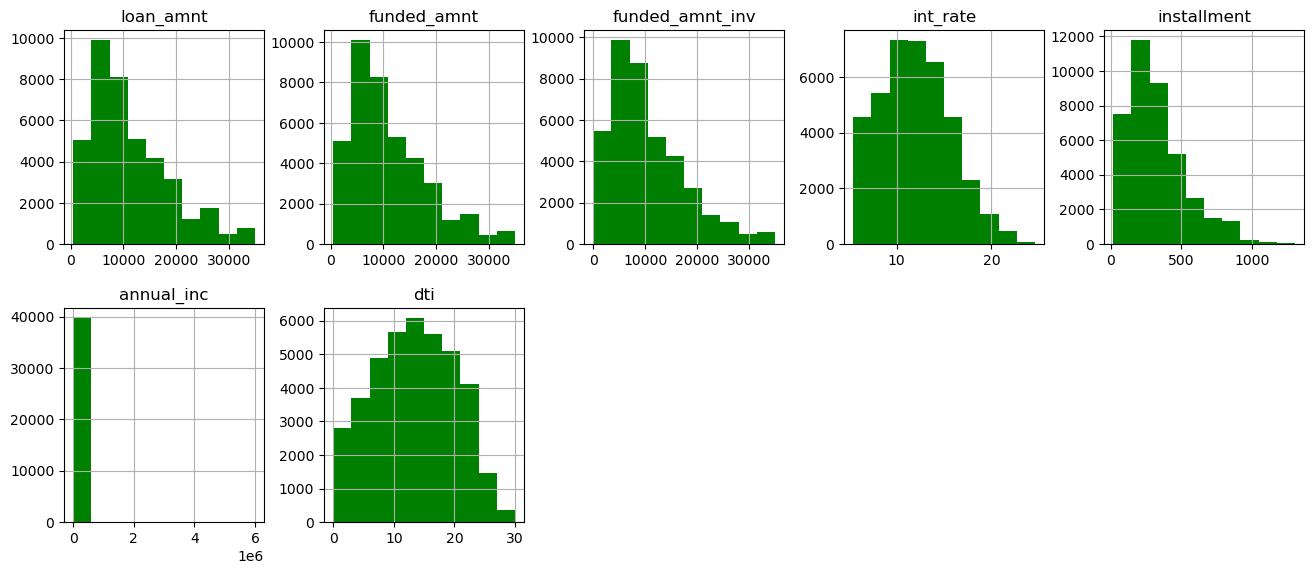

In [321]:
df_loan_cleaned[cols_quantitative].hist(layout = (3,5), figsize=(16,10), color = 'g')
print('Data Distribution')

### All the distributions look fine except annula_inc
### Using box plot to analyse the distribution of annula_Inc to remove outliers

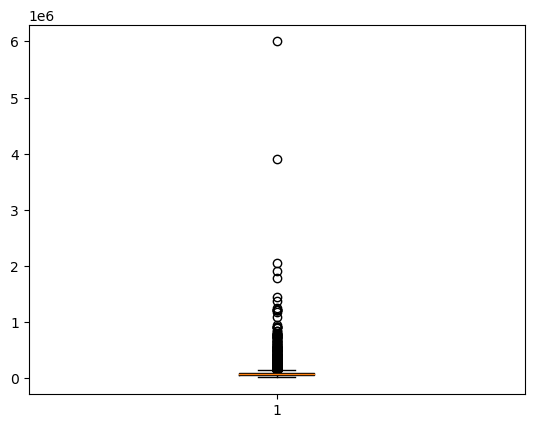

In [259]:
#by the above plot we can incur that annual_inc has outliers. below we can verify the same with box plot
plt.boxplot(df_loan_cleaned.annual_inc)
plt.show()

In [260]:
#functiona for handling outliers
#Here we have considered 5th percentile as Q1 and 95th percentile as Q2 as this is financial data.

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [262]:
#Detecting the outliers
outliers = []
# Outlier detection for continuous variables
for col in cols_quantitative:
    print(f"{col} :  {check_outlier(df_loan_cleaned, col)}")
    outliers.append(check_outlier(df_loan_cleaned, col))
    
print(f"Outliers detected? {np.array(outliers).any()}")

loan_amnt :  False
funded_amnt :  False
funded_amnt_inv :  False
int_rate :  False
installment :  False
annual_inc :  True
dti :  False
Outliers detected? True


In [263]:
df_loan_cleaned.shape

(38577, 23)

In [264]:
replace_with_thresholds(df_loan_cleaned,"annual_inc")

<Axes: ylabel='annual_inc'>

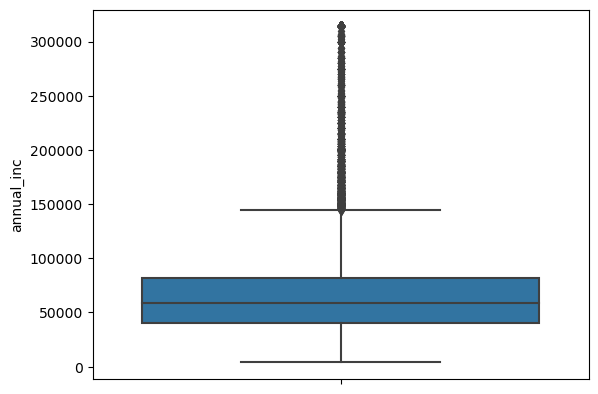

In [265]:
sns.boxplot(y="annual_inc",
            data=df_loan_cleaned)

Data Distribution


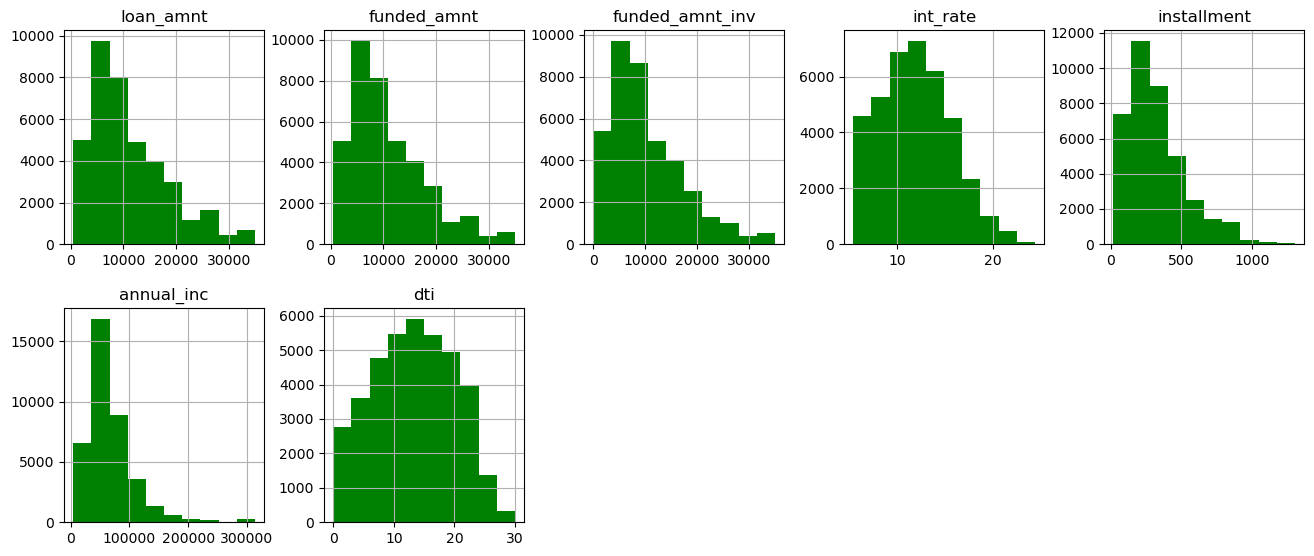

In [266]:
df_loan_cleaned[cols_quantitative].hist(layout = (3,5), figsize=(16,10), color = 'g')
print('Data Distribution')

### Plotting bar graph for categorical variables to understand the distribution

In [322]:
print(cols_categorical)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'initial_list_status', 'pub_rec_bankruptcies', 'issue_month', 'issue_year']


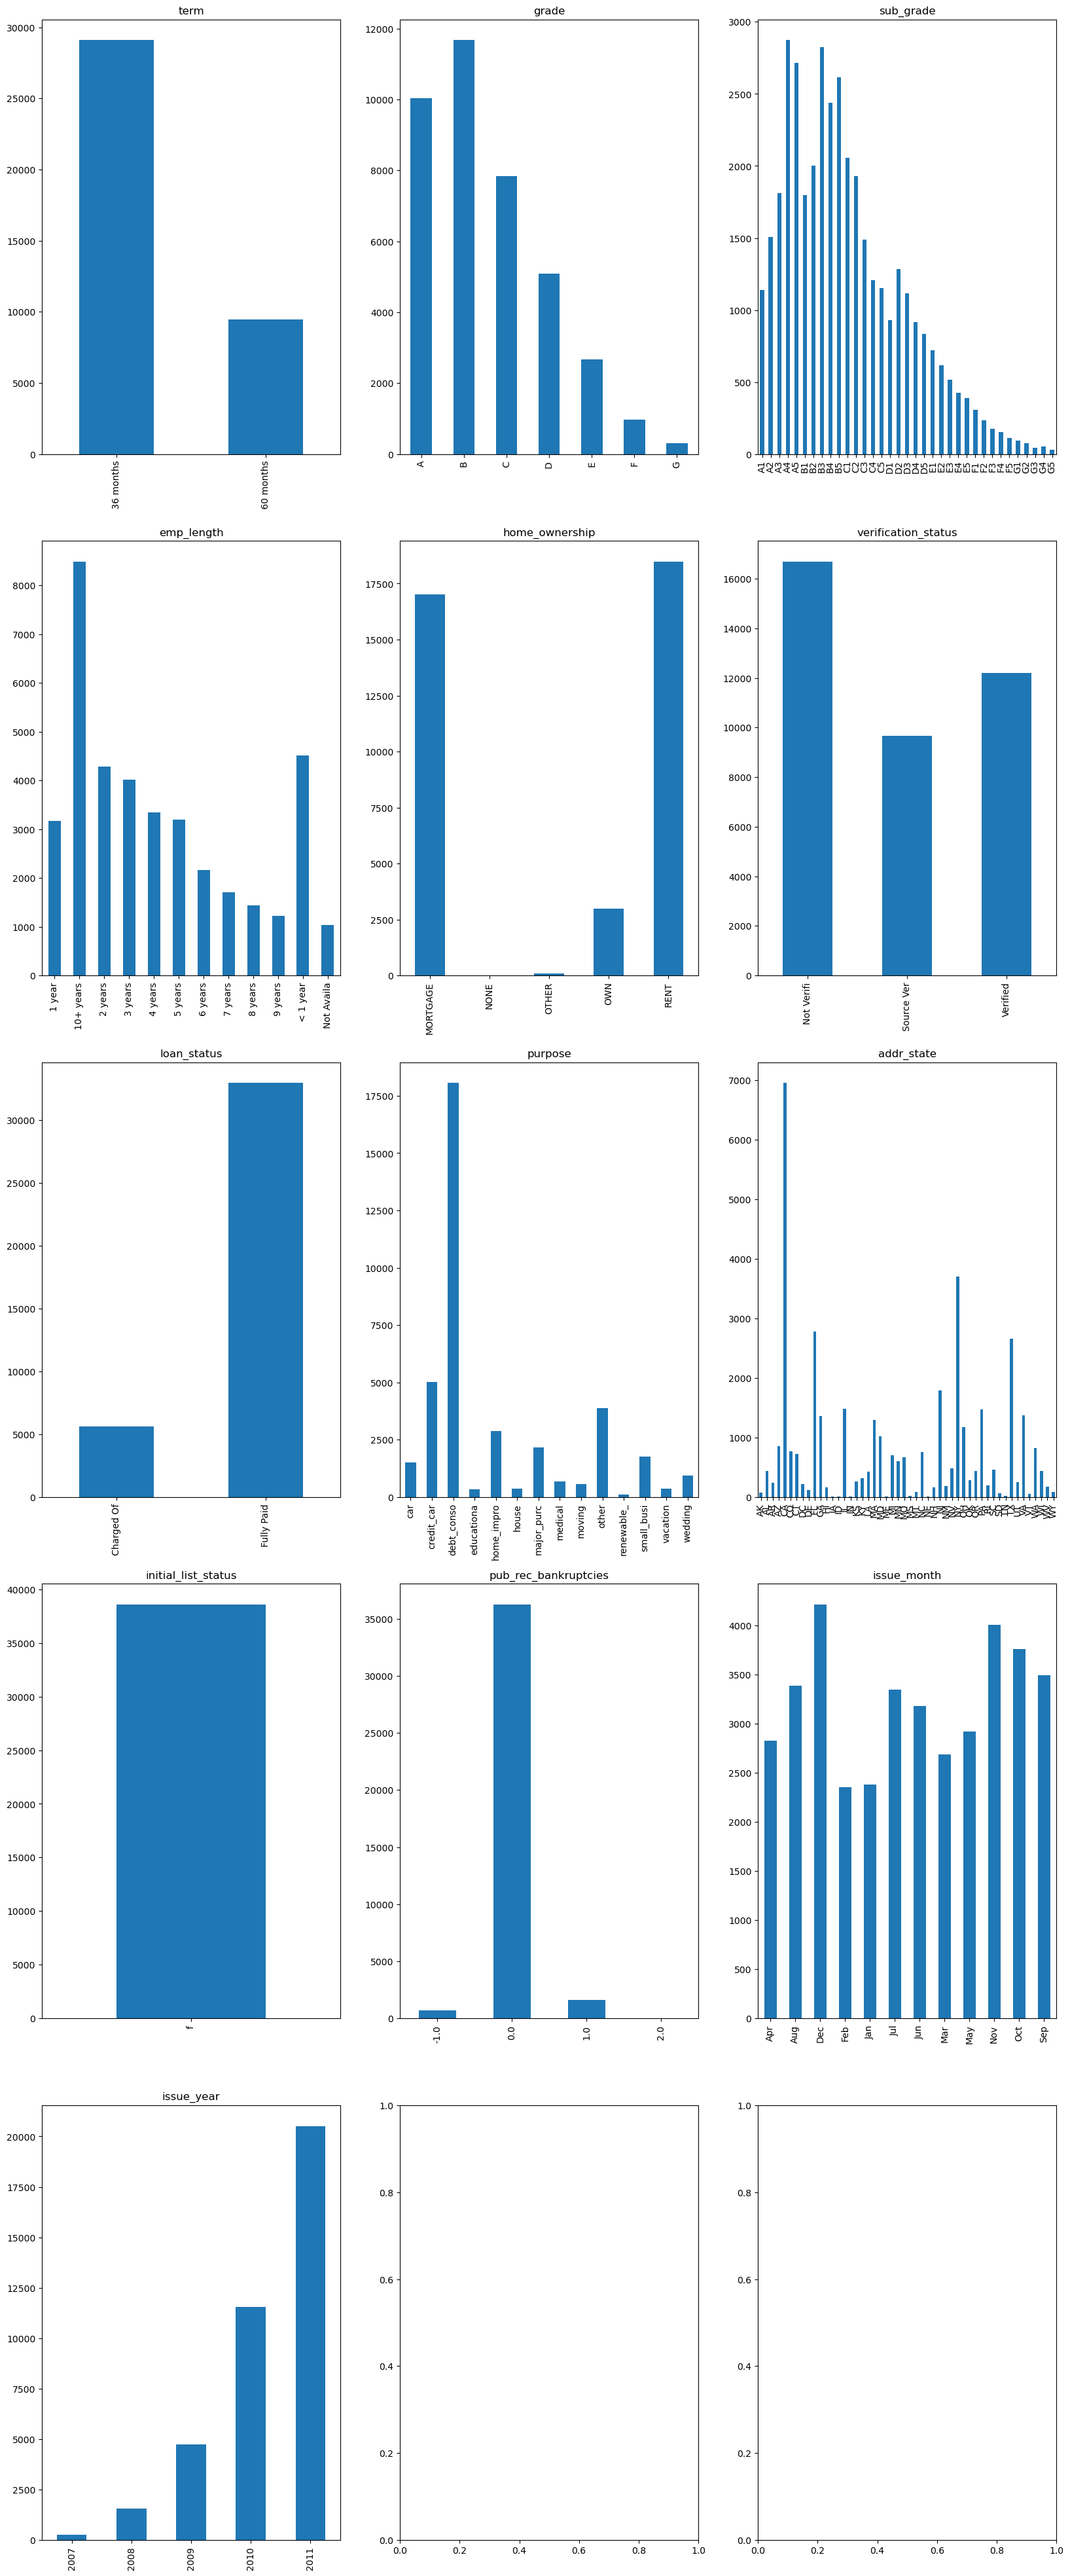

In [307]:
categorical_features = cols_categorical
subplot_rows=round(len(categorical_features)/3)+1
subplot_cols=3
i=0
j=0
fig, ax = plt.subplots(subplot_rows, subplot_cols,figsize=(20,50))
for categorical_feature in categorical_features:
    df_valueCounts=df_loan_cleaned[categorical_feature].value_counts().sort_index()
    df_valueCounts.plot(kind='bar', ax=ax[i,j])
    #.set_xticklabels([str(tick)[:45] for tick in df_valueCounts.index])
    ax[i,j].set_xticklabels(item.get_text()[:10] for item in ax[i,j].get_xticklabels())
    ax[i,j].title.set_text(categorical_feature)
    ax[i,j]
    #test.set_xticklabels(item.get_text()[:10] for item in test.get_xticklabels())
           
    if j<subplot_cols-1:
        j=j+1
    else:
        if i<subplot_rows-1:
            i=i+1        
        j=0
fig.show()

### Based on above displayed univariant analysis. Below are our inferences
1. initil_list_status feture can be ignored as it has only obe value
1. The number of loans gradually increases year by year.
1. More loans are issued ate the year end in the month of december. It might be because of festival season.
1. most of the borrowers houses are uner mortgage or they are renting the house.

<a id="5"></a>
## Step-5 Bivariate Analysis

In [ ]:
data=df_loan_cleaned

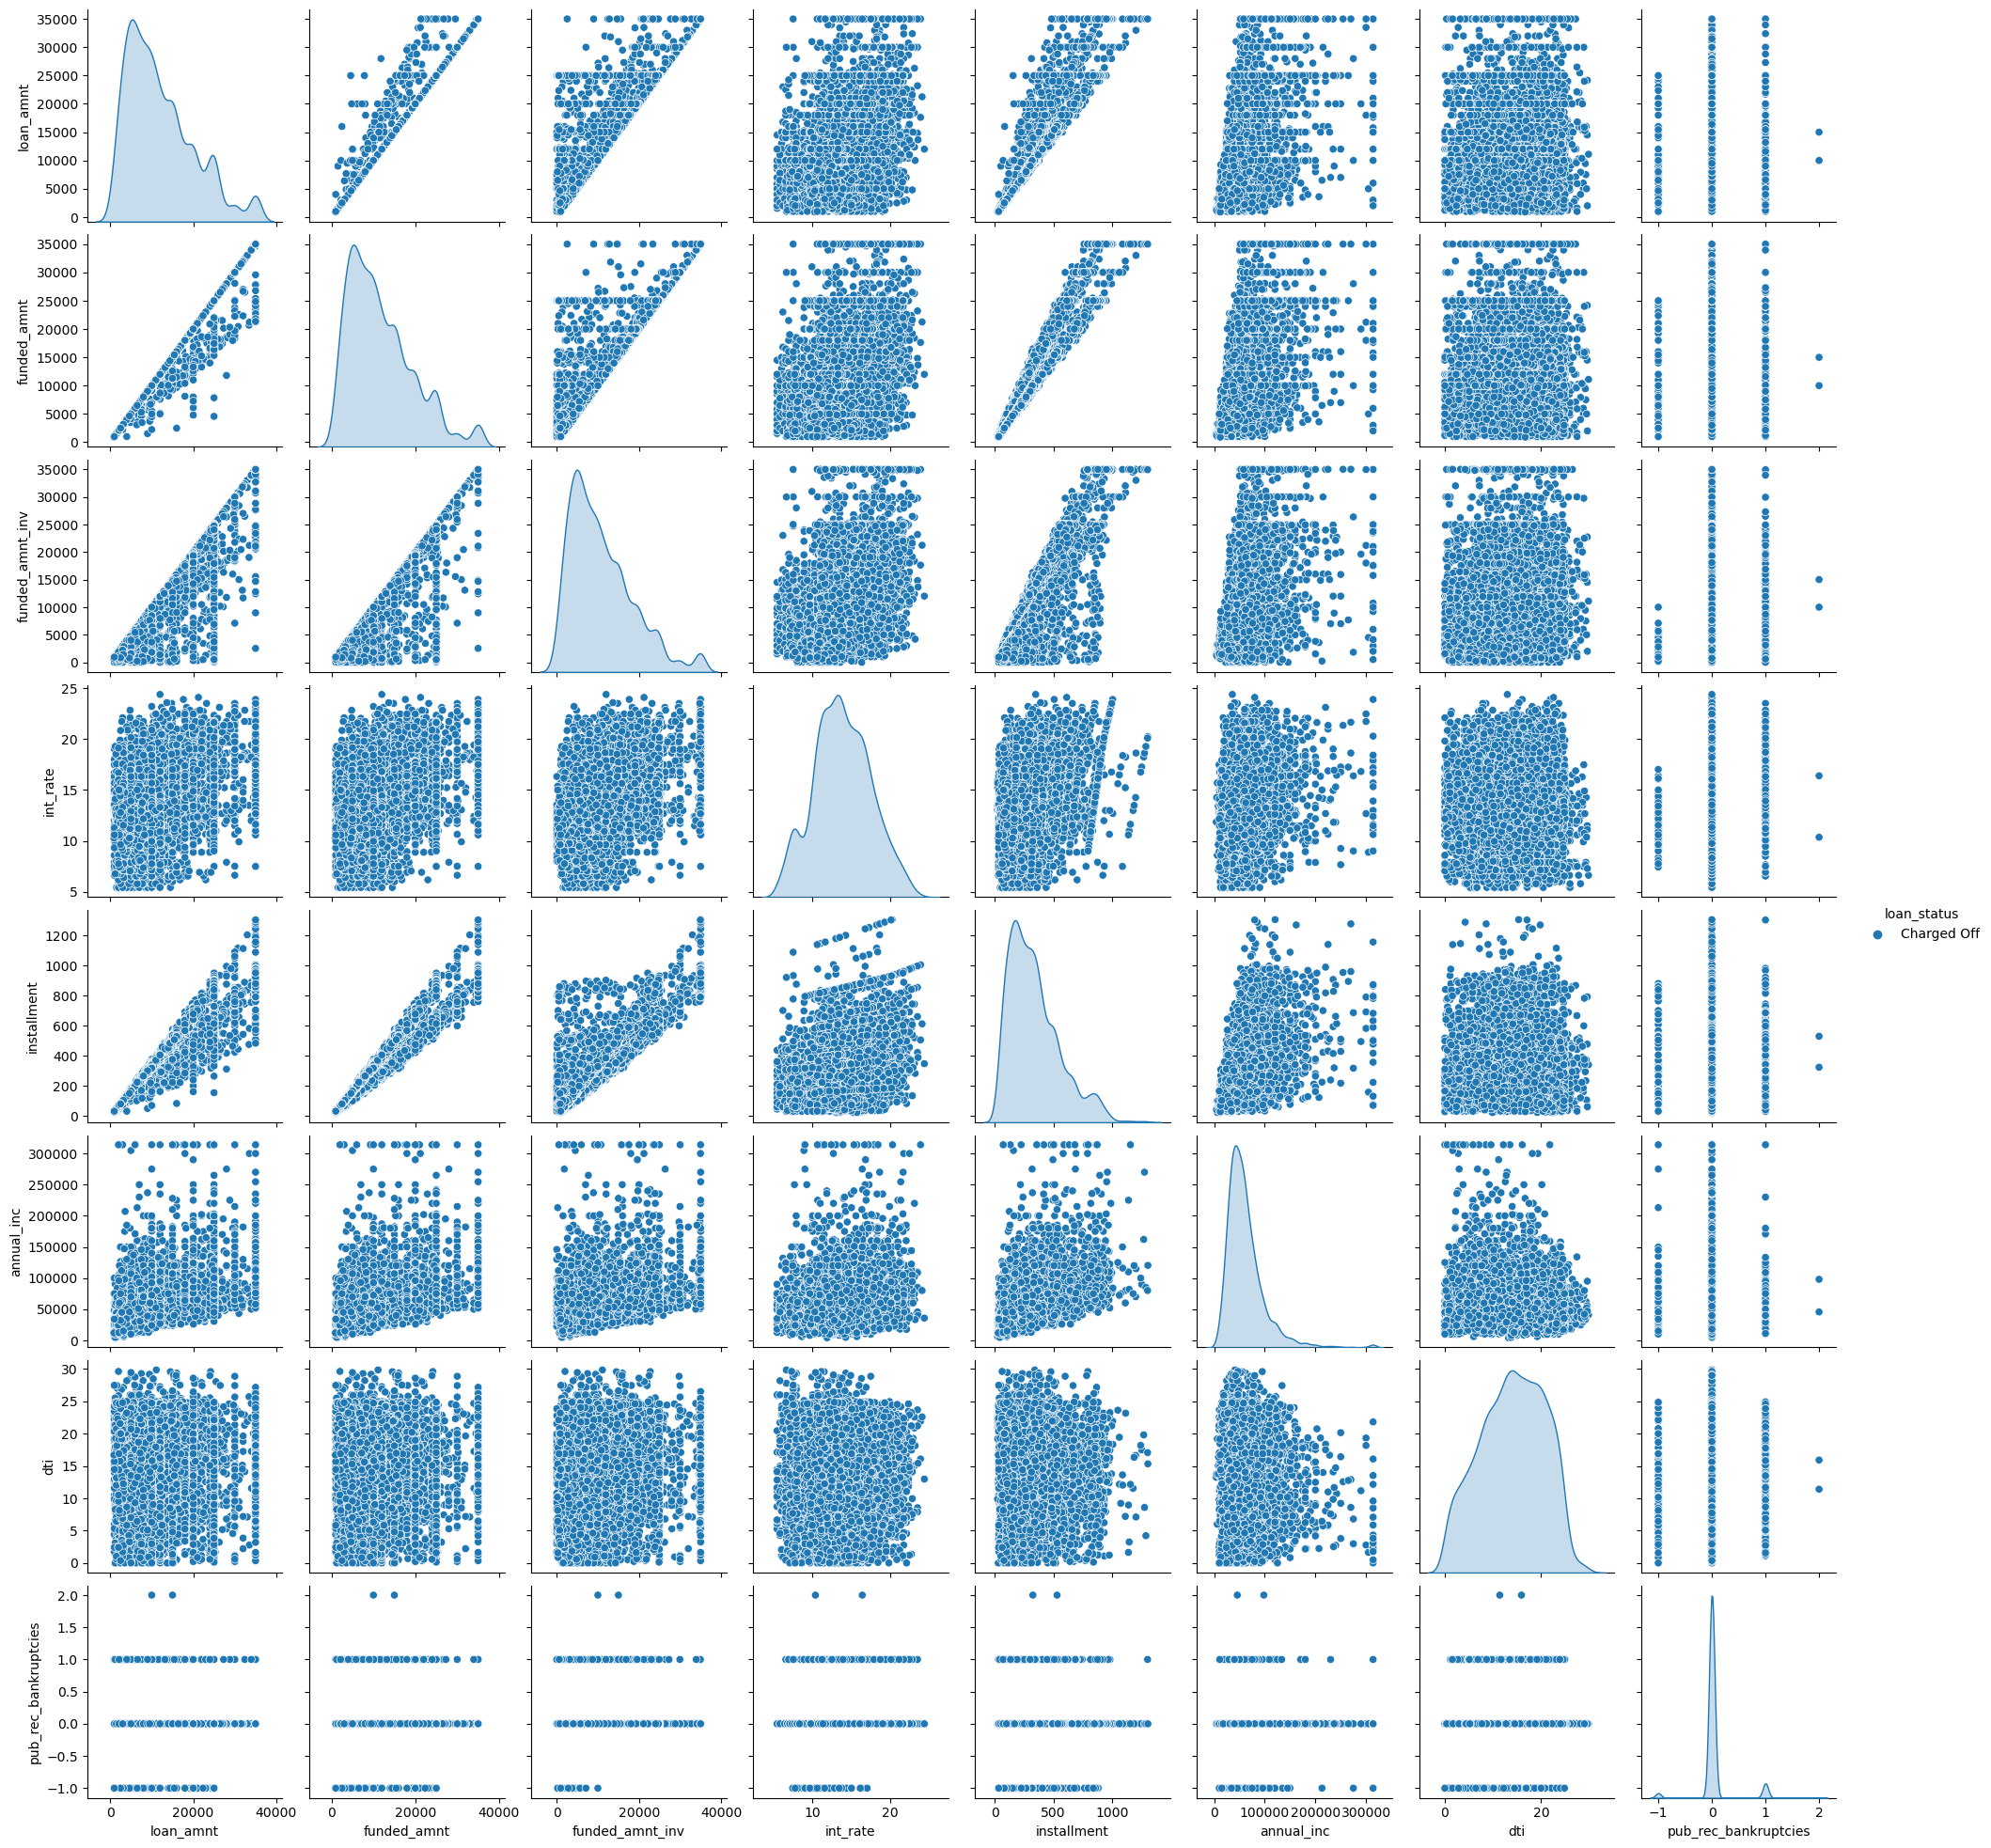

In [313]:
sns.pairplot(data=df_loan_cleaned[df_loan_cleaned['loan_status']=='Charged Off'], hue='loan_status')